In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
df = pd.read_csv(r'data/processed/cleaned_data.csv')
df.head()

,Maker,Adv_year,Adv_month,Color,Gearbox,Fuel_type,Price,Seat_num,Door_num,Engine_size,Prod_year,Model,Body_type,Runned_miles
0,Bentley,2018,4,Silver,Automatic,Petrol,21500,5.0,4.0,6.8,2000.0,Arnage,Saloon,60000.0
1,Bentley,2018,6,Grey,Automatic,Petrol,28750,5.0,4.0,6.8,2002.0,Arnage,Saloon,44000.0
2,Bentley,2017,11,Blue,Automatic,Petrol,29999,5.0,4.0,6.8,2002.0,Arnage,Saloon,55000.0
3,Bentley,2018,4,Green,Automatic,Petrol,34948,5.0,4.0,6.8,2003.0,Arnage,Saloon,14000.0
4,Bentley,2017,11,Grey,Automatic,Petrol,26555,5.0,4.0,6.8,2003.0,Arnage,Saloon,61652.0


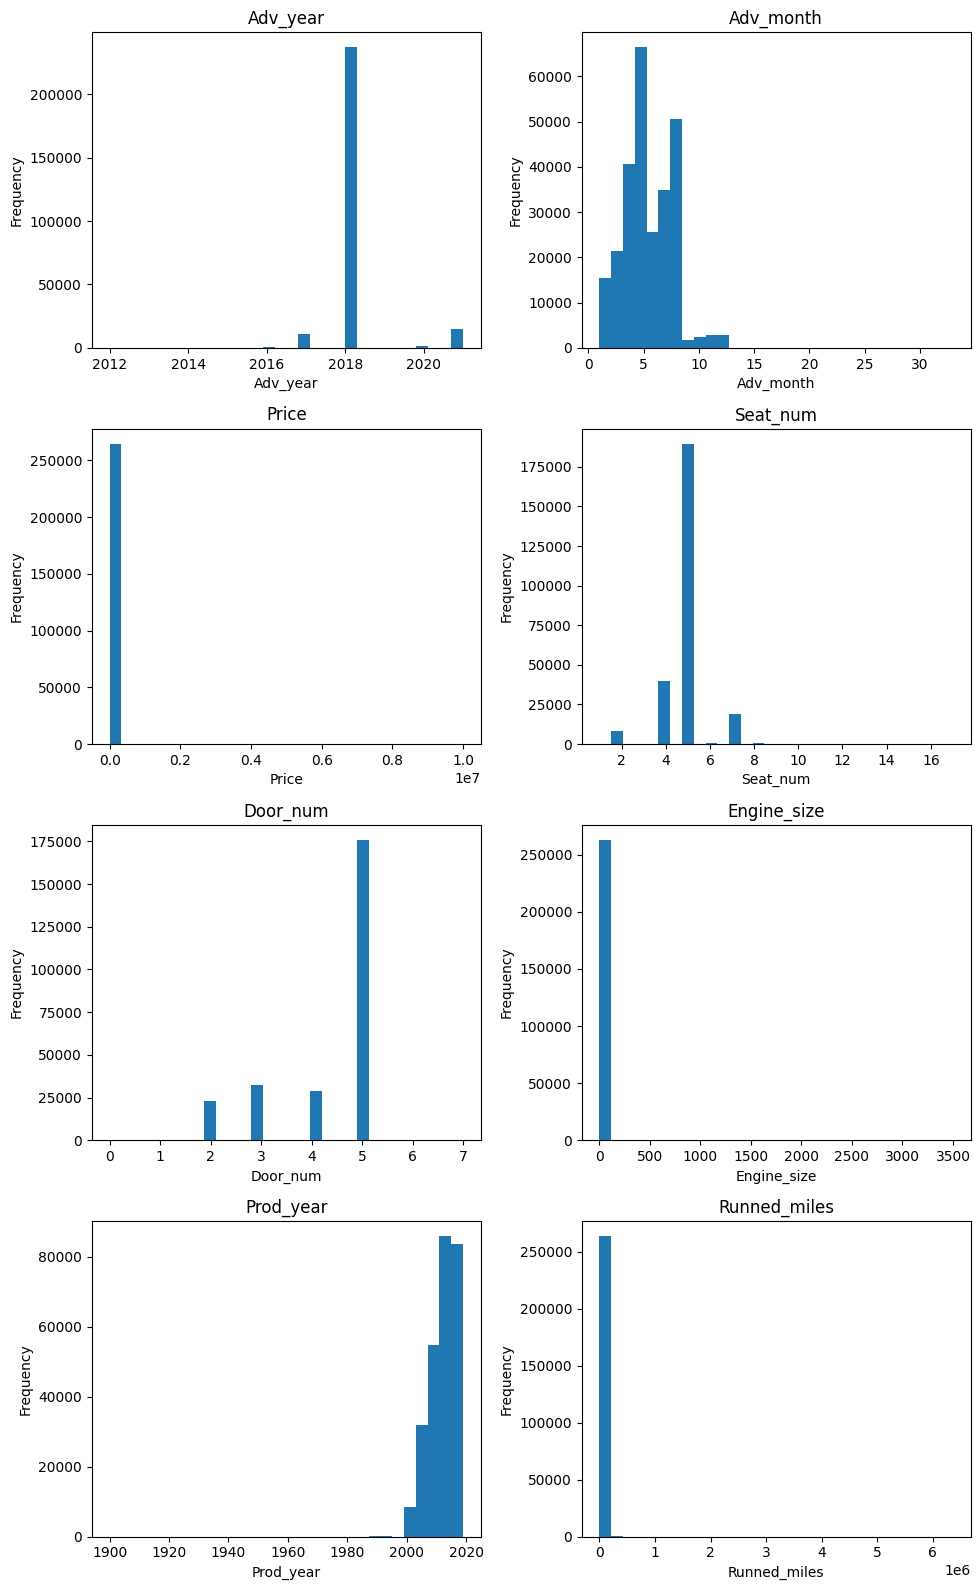

In [101]:
num_cols = df.select_dtypes(include=["number"]).columns

n = len(num_cols)
cols = 2
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Remove outliers

In [102]:
df = df[df["Price"] <= 100000]
df = df[df['Prod_year'] >= 1960]
df = df[df['Engine_size'] < 500]
df = df[df['Runned_miles'] < 500000]

## Handle missing values

In [103]:
columns = df.columns

for col in columns:
    print(f'{col} : {df[col].isnull().sum()}')

Maker : 0
Adv_year : 0
Adv_month : 0
Color : 21046
Gearbox : 56
Fuel_type : 320
Price : 0
Seat_num : 5696
Door_num : 3716
Engine_size : 0
Prod_year : 0
Model : 0
Body_type : 769
Runned_miles : 0


In [104]:
len(df)

259648

**Drop unnecessary columns**

In [105]:
df.drop(columns=['Adv_year', 'Adv_month', 'Color', 'Seat_num', 'Door_num'], inplace=True)
df.head()

,Maker,Gearbox,Fuel_type,Price,Engine_size,Prod_year,Model,Body_type,Runned_miles
0,Bentley,Automatic,Petrol,21500,6.8,2000.0,Arnage,Saloon,60000.0
1,Bentley,Automatic,Petrol,28750,6.8,2002.0,Arnage,Saloon,44000.0
2,Bentley,Automatic,Petrol,29999,6.8,2002.0,Arnage,Saloon,55000.0
3,Bentley,Automatic,Petrol,34948,6.8,2003.0,Arnage,Saloon,14000.0
4,Bentley,Automatic,Petrol,26555,6.8,2003.0,Arnage,Saloon,61652.0


In [106]:
df.dropna(inplace=True)

In [107]:
columns = df.columns

for col in columns:
    print(f'{col} : {df[col].isnull().sum()}')

Maker : 0
Gearbox : 0
Fuel_type : 0
Price : 0
Engine_size : 0
Prod_year : 0
Model : 0
Body_type : 0
Runned_miles : 0


## Standarize

In [108]:
df['Maker'] = df['Maker'].str.lower().str.strip()
df['Gearbox'] = df['Gearbox'].str.lower().str.strip()
df['Fuel_type'] = df['Fuel_type'].str.lower().str.strip()
df['Model'] = df['Model'].str.lower().str.strip()
df['Body_type'] = df['Body_type'].str.lower().str.strip()

In [109]:
df.head()

,Maker,Gearbox,Fuel_type,Price,Engine_size,Prod_year,Model,Body_type,Runned_miles
0,bentley,automatic,petrol,21500,6.8,2000.0,arnage,saloon,60000.0
1,bentley,automatic,petrol,28750,6.8,2002.0,arnage,saloon,44000.0
2,bentley,automatic,petrol,29999,6.8,2002.0,arnage,saloon,55000.0
3,bentley,automatic,petrol,34948,6.8,2003.0,arnage,saloon,14000.0
4,bentley,automatic,petrol,26555,6.8,2003.0,arnage,saloon,61652.0


### Polish units of measurement

In [110]:
rate = 4.84
df['Price'] = (df['Price'] * rate).round(0)
df['Runned_km'] = (df['Runned_miles'] * 1.60934).round(0)
df.drop(columns='Runned_miles', inplace=True)

In [111]:
df.head()

,Maker,Gearbox,Fuel_type,Price,Engine_size,Prod_year,Model,Body_type,Runned_km
0,bentley,automatic,petrol,104060.0,6.8,2000.0,arnage,saloon,96560.0
1,bentley,automatic,petrol,139150.0,6.8,2002.0,arnage,saloon,70811.0
2,bentley,automatic,petrol,145195.0,6.8,2002.0,arnage,saloon,88514.0
3,bentley,automatic,petrol,169148.0,6.8,2003.0,arnage,saloon,22531.0
4,bentley,automatic,petrol,128526.0,6.8,2003.0,arnage,saloon,99219.0


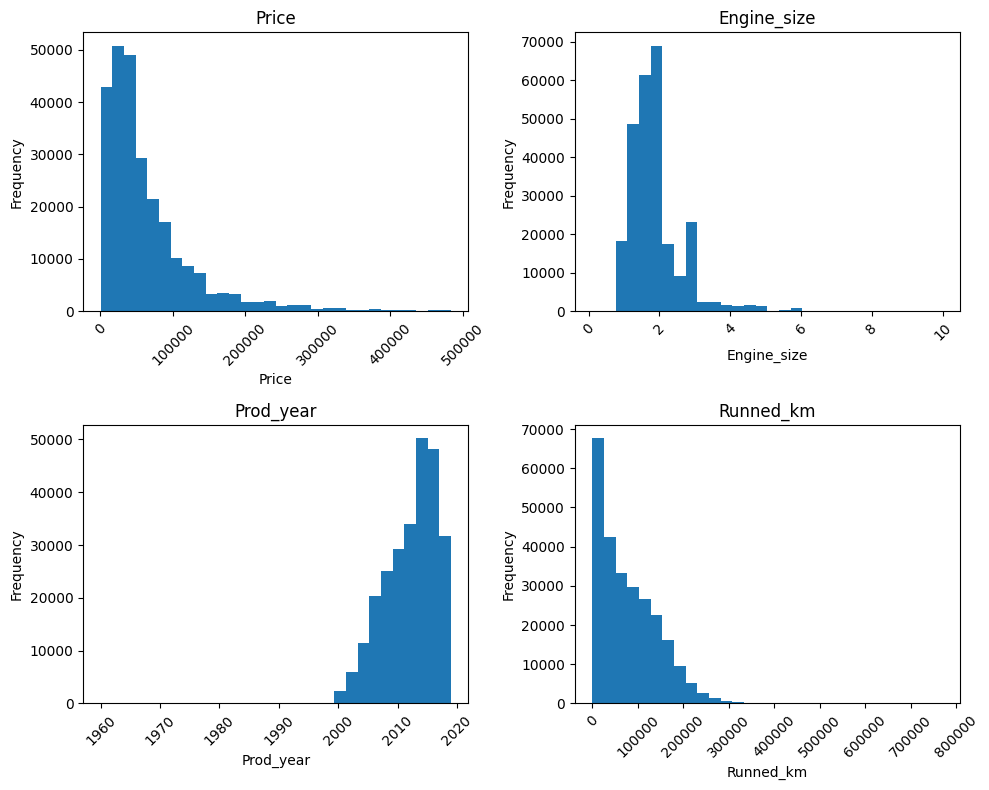

In [112]:
num_cols = df.select_dtypes(include=["number"]).columns

n = len(num_cols)
cols = 2
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=30)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

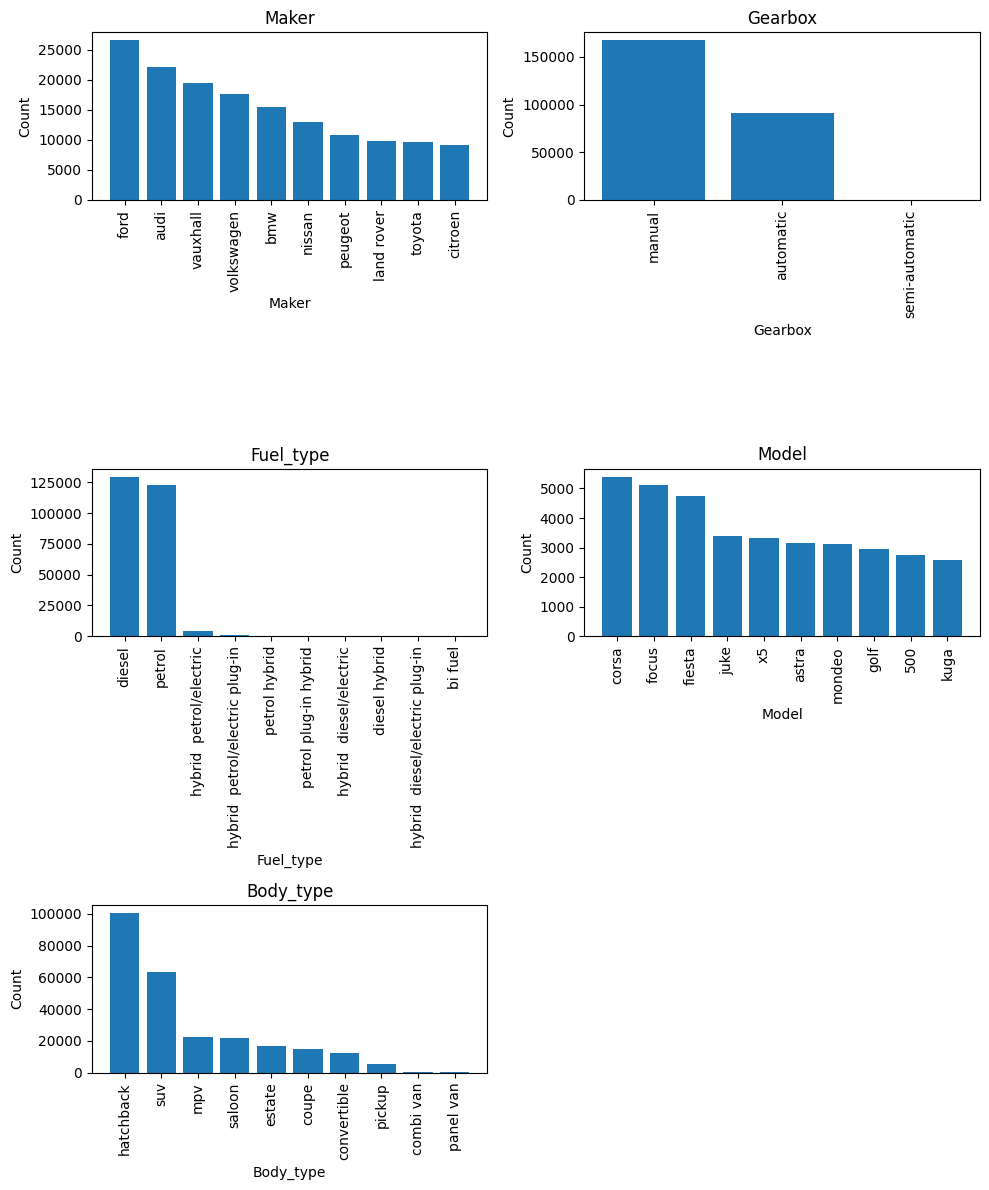

In [116]:
cat_cols = df.select_dtypes(include=["object"]).columns

TOP_N = 10 

n = len(cat_cols)
cols = 2
rows = int(np.ceil(n / cols))

fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts(dropna=True).head(TOP_N)

    axes[i].bar(counts.index.astype(str), counts.values)
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=90)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Save

In [114]:
df.to_csv(r'data/processed/preprocessed_data.csv', index=False)